### Всем приветики! 
ДЗ Выполнили **Натела Кордзахия** и **Артем Татаринов БЭК181 :)**


### Давайте начнем!!!

In [1]:
!pip install sktime[all_extras]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
f2 = pd.read_csv('/content/drive/MyDrive/Data/Monthly Australian wine sales thousands of litres By wine makers in bo.csv')


 Мы студенты простые, любим изучать всякие аддиктивные товары (особенно Артём - год назад он писал у Кирилла Александровича курсач по схожей теме, про Нателу - умолчим, она просто солнышко).

Итак, данные были взяты на kaggle: https://www.kaggle.com/krish525/open-time-series-data. Почему эти ряды? Пропусков нет, да и количество наблюдений приличное.

Активно взаимодействовать далее мы будем с месячными продажами (в млн. долл.) белого сухого вина в Австралии. 

In [5]:
time = pd.date_range(start='1980-01-01', periods=len(f2), freq='M')
f2['date'] = time
f2['year'] = time.year
f2['month'] = time.month
f2.head()

,Unnamed: 0,Fortified,Drywhite,Sweetwhite,Red,Rose,Sparkling,Total,date,year,month
0,1,2585,1954,85,464,112.0,1686,15136.0,1980-01-31,1980,1
1,2,3368,2302,89,675,118.0,1591,16733.0,1980-02-29,1980,2
2,3,3210,3054,109,703,129.0,2304,20016.0,1980-03-31,1980,3
3,4,3111,2414,95,887,99.0,1712,17708.0,1980-04-30,1980,4
4,5,3756,2226,91,1139,116.0,1471,18019.0,1980-05-31,1980,5


### «Намалевич». 
Построй графики рядов, графики автокорреляционных функций, графики с нарезкой
ряда на годы для иллюстрации сезонности


Будем исследовать продажи белого сухого)))

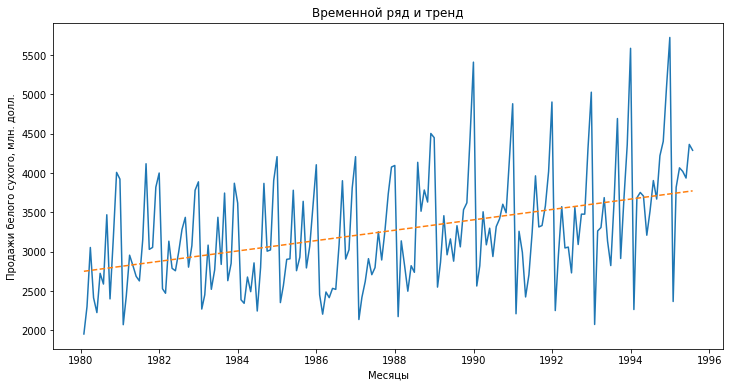

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(f2.date, f2.Drywhite)
plt.xlabel('Месяцы')
plt.ylabel('Продажи белого сухого, млн. долл.')
plt.title('Временной ряд и тренд')
#f2.Drywhite.apply(np.log).plot()
#насчет тренда: 
from sklearn import linear_model
reg1 = linear_model.LinearRegression()
reg1.fit(f2[['Unnamed: 0']], f2.Drywhite)
plt.plot(f2.date, reg1.predict(f2[['Unnamed: 0']]), linestyle='--')

ВОУ ВАУ... Каждый раз поражаюсь возможностям техники... 

Таки что мы получили?

В среднем - растет во времени, т.е. тренд есть! Видно и на глаз, и по построеной на время регрессии.

 Но, кроме того, есть подозрение на излом тренда около 1987-1989 гг, надо сделать отдельные регрессии для двух частей

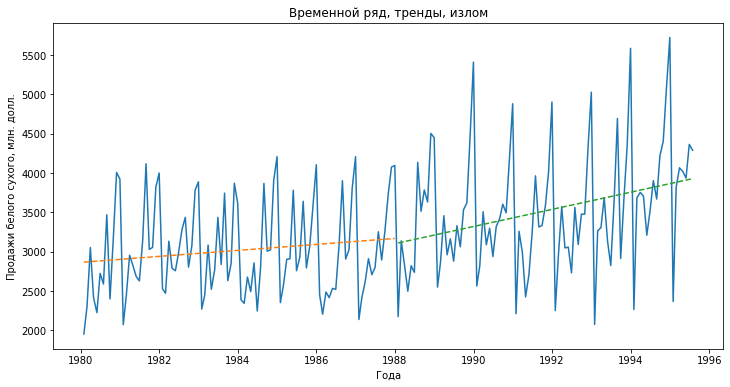

In [7]:
before = f2.loc[f2.year <= 1987]
after = f2.loc[f2.year > 1987]

plt.figure(figsize=(12, 6))
plt.plot(f2.date, f2.Drywhite)
plt.xlabel('Года')
plt.ylabel('Продажи белого сухого, млн. долл.')
plt.title('Временной ряд, тренды, излом')
#f2.Drywhite.apply(np.log).plot()
#насчет тренда: 
from sklearn import linear_model
reg2 = linear_model.LinearRegression()
reg2.fit(before[['Unnamed: 0']], before.Drywhite)
plt.plot(before.date, reg2.predict(before[['Unnamed: 0']]), linestyle='--')

reg3 = linear_model.LinearRegression()
reg3.fit(after[['Unnamed: 0']], after.Drywhite)
plt.plot(after.date, reg3.predict(after[['Unnamed: 0']]), linestyle='--')


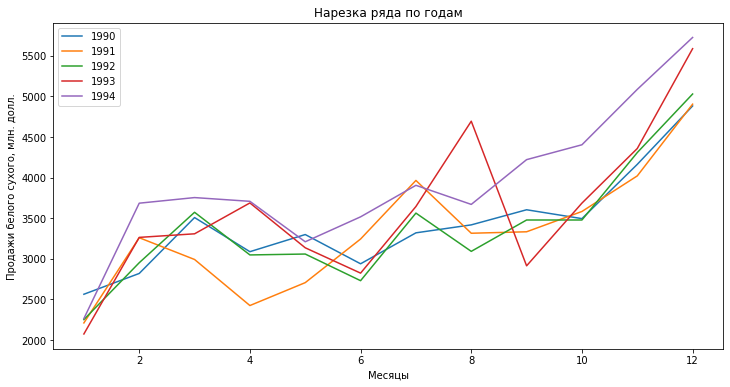

In [8]:
plt.figure(figsize=(12, 6))

y1 = np.array([1990, 1991, 1992, 1993, 1994])
y2 = f2.year.unique()
months = f2.month.unique()
for i in y1:
    plt.plot(months, f2.loc[f2.year == i].Drywhite, label=str(i))
plt.xlabel('Месяцы')
plt.ylabel('Продажи белого сухого, млн. долл.')
plt.title('Нарезка ряда по годам')
plt.legend()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
ts = pd.Series(list(f2.Drywhite), index=f2.date)

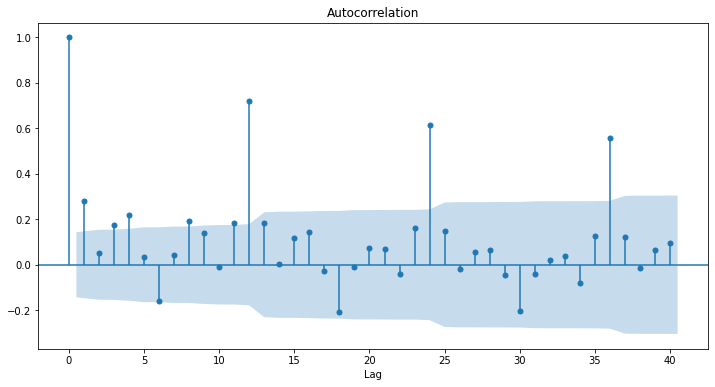

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(ts, lags=40, ax=ax)
plt.xlabel('Lag')
plt.show()

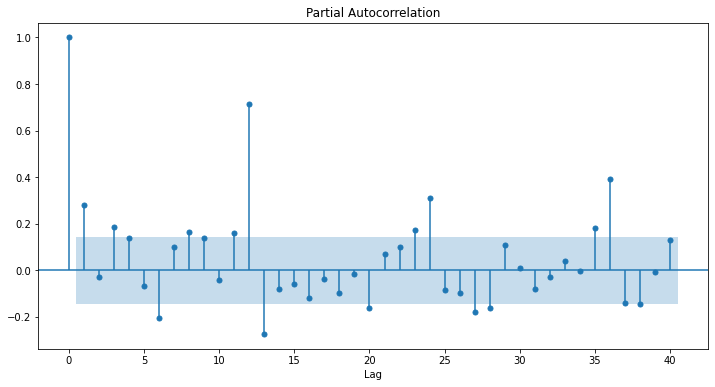

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(ts, lags=40, ax=ax)
plt.xlabel('Lag')
plt.show()

### «Твиттер». Кратко прокомментируй полученные графики. 
Явлются ли ряды сезонными? есть ли
тренд? стационарны ли ряды? есть ли точки излома? растёт ли амплитуда колебаний ряда? Возьми
логарифм ряда, если душа тянется к логарифму.

характеристики:

* сезонность есть, видно на графике-нарезке, + по автокор функции
* тренд есть
* нестационарны (тренд + растущая дисперсия)
* точка излома похоже есть, около 1988 года
* амплитуда колебаний растет, оттого ряд и не стационарен в том числе   
    

### 4. «Двенадцать месяцев». Необходимо исследовать качество прогнозов минимум 6 моделей:

• Наивная, $\hat{y}_{t+1} = y_t$.

• Сезонная наивная, $\hat{y}_{t+1} = y_{t+1−12}$.

• SARIMA(1, 1, 1)(1, 0, 0)[12].

• Алгоритм Хиндмана-Хандакара автоматического подбора SARIMA.

• ETS(AAA)

• ETS с автоматическим выбором по AIC.

1) Сравни качество прогнозов по средней абсолютной ошибке MAE на тестовой выборке. В качестве тестовой выборки возьми последний год наблюдений, в качестве обучающей — все остальные наблюдения.

2) На бонусный балл: сравни качество прогнозов по средней абсолютной ошибке MAE на один шаг вперёд с помощью кросс-валидации. Кросс-валидацию проводи растущим окном, начав с окна в 80% исходной выборки.

In [13]:
import sktime.forecasting.naive
from sktime.forecasting.base import ForecastingHorizon

Короче. У sktime какие-то беды бывают с TimeStamp, поэтому будет две версии ряда: с обычным индексом и с красивым индексом от `pd.date_range`. 

Еще важный поинт: там пара алгоритмов, судя по текущему опыту, с логарифмами лучше работает, потэтому возьмем логарифмы.

In [14]:
# с датами уже есть, это переменная ts
# обычный ряд назовем ns (numerical series), прошу простить мне мой английский

stop = 12 #количество периодов, оставляемых на тест 

ns_learn = f2.iloc[:-(stop)].Drywhite.apply(np.log) # обущающая выборка
time_learn = f2.iloc[:-(stop)].date # datetime индекс для графиков

ns_test = f2.iloc[-stop:].Drywhite.apply(np.log) # тестовая выборка
time_test = f2.iloc[-stop:].date #  datetime индекс для графиков

ts_log = f2.Drywhite.apply(np.log)
ts_log.index = f2.date

Здесь мы будем очень наивные..

In [15]:
hor = ForecastingHorizon(np.arange(12) + 1)
naive = sktime.forecasting.naive.NaiveForecaster(strategy='last', sp=1) 
naive.fit(ns_learn)
naive_pred = pd.Series(list(naive.predict(fh = hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

Графики буду делать не на весь ряд, возьму ближе к концу, чтобы видней было

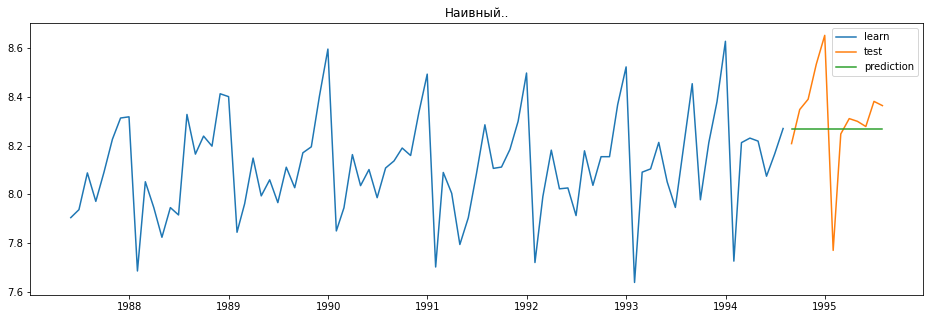

In [16]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, naive_pred, label='prediction')
plt.title('Наивный..')
plt.legend()

Здесь будем чуть менее наивные.. и учтем сезонность:  $\hat{y}_{t+1} = y_{t+1−12}$

In [17]:
naive_seas = sktime.forecasting.naive.NaiveForecaster(strategy='last', sp=12) 
naive_seas.fit(ns_learn)
naive_seas_pred = pd.Series(list(naive_seas.predict(fh = hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

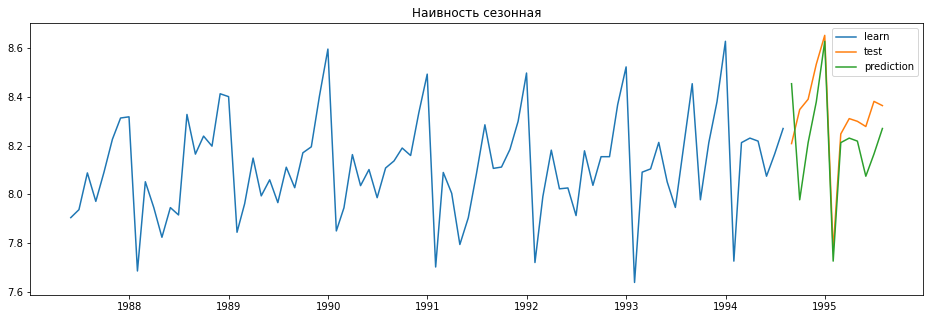

In [18]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, naive_seas_pred, label='prediction')
plt.title('Наивность сезонная')
plt.legend()

Становимся умнее с каждым шагом.. теперь - SARIMA(1, 1, 1)(1, 0, 0)[12].

sktime.forecasting.arima.ARIMA(order=1, 0, 0, seasonal_order=0, 0, 0, 0, start_params=None, method='lbfgs', maxiter=50, suppress_warnings=False, out_of_sample_size=0, scoring='mse', scoring_args=None, trend=None, with_intercept=True, **sarimax_kwargs)

In [19]:
from sktime.forecasting.arima import ARIMA

In [20]:
sarima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
sarima.fit(ns_learn)
sarima_pred = pd.Series(list(sarima.predict(fh = hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

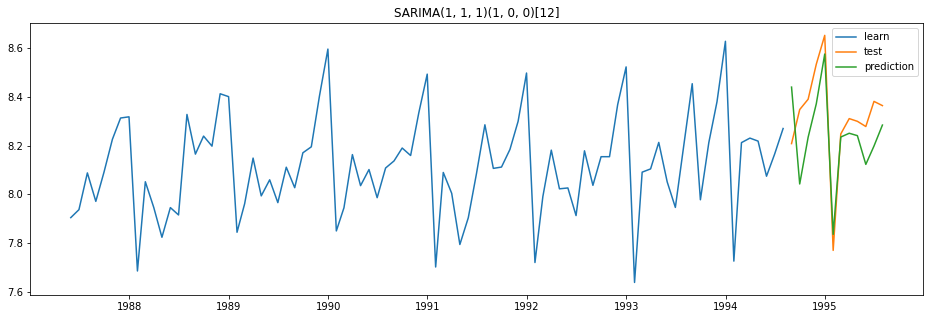

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, sarima_pred, label='prediction')
plt.title('SARIMA(1, 1, 1)(1, 0, 0)[12]')
plt.legend()

Методологически растем! Берем автоариму! 

In [22]:
from sktime.forecasting.arima import AutoARIMA

auto = AutoARIMA(start_p=1, d=None, start_q=0, max_p=2, max_d=1, max_q=0, start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, sp=12, suppress_warnings=True, stepwise=False, n_jobs=-1)
auto.fit(ns_learn)
auto_pred = pd.Series(list(auto.predict(fh=hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

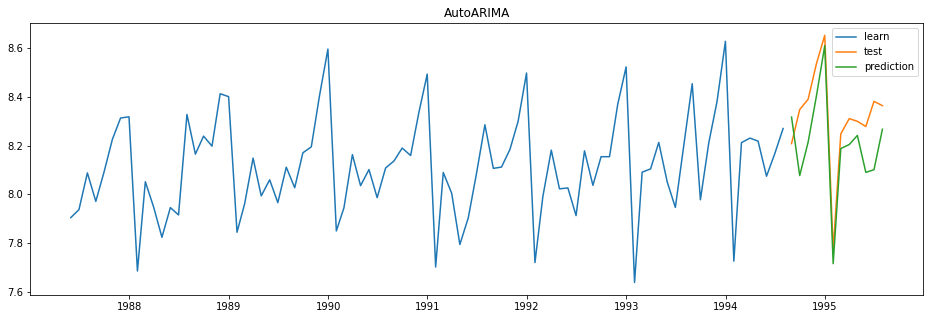

In [23]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, auto_pred, label='prediction')
plt.title('AutoARIMA')
plt.legend()

Продолжаем наш экскурс по моделям временных рядов..
На очереди ETS(AAA)

In [24]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

ets = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
ets.fit(ns_learn)
ets_pred = pd.Series(list(ets.predict(fh=hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

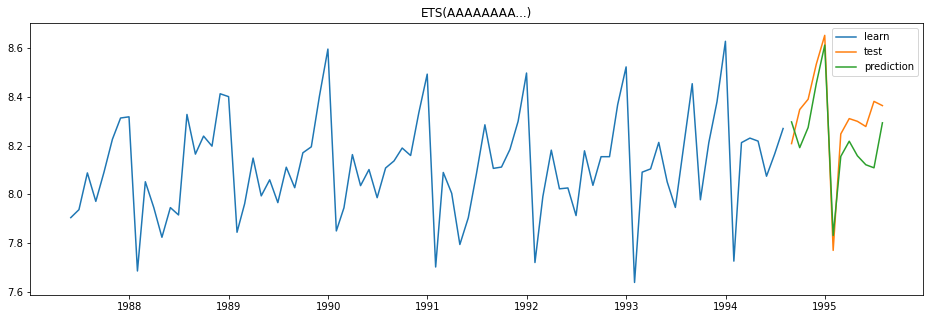

In [25]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, ets_pred, label='prediction')
plt.title('ETS(AAAAAAAA...)')
plt.legend()

А пущай теперь модель сама как-нибудь..

In [26]:
from sktime.forecasting.ets import AutoETS

auto_ets = AutoETS(auto=True, sp=12, maxiter=3000, njobs=-1)

In [27]:
s_period = pd.Series(list(ts), index = pd.PeriodIndex(ts.index, freq='M'))
#s_period.index = pd.PeriodIndex(ts.index, freq='M')

# шаманю с форматом индексов чтобы шайтан ETS заработала 
r = f2.Drywhite.apply(np.log)
r.index = pd.date_range(start='31.01.1980', periods=len(r), freq='M')

q = r.astype('float64')
q.index = pd.PeriodIndex(r.index)

s_learn = q[:-12]
s_test = q[-12:]

# ну пожалуйста давай
auto_ets.fit(s_learn)
auto_ets_pred = pd.Series(list(auto_ets.predict(fh=hor)), index=pd.date_range(start='1994-08', periods=12, freq='M'))

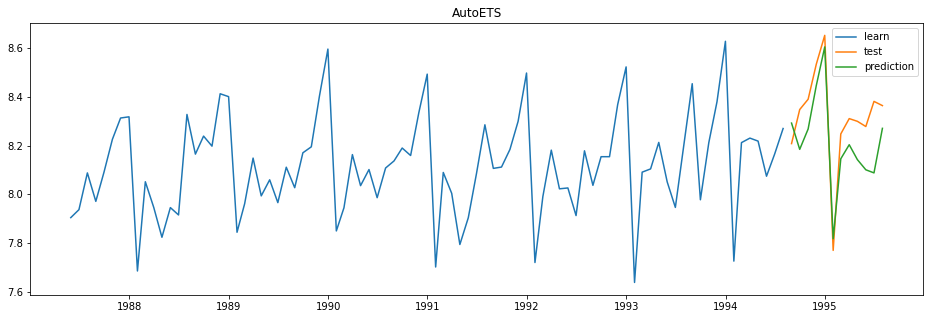

In [28]:
plt.figure(figsize=(16, 5))
plt.plot(time_learn[-int(len(time_learn) / 2):], ns_learn[-int(len(time_learn) / 2):], label='learn')
plt.plot(time_test, ns_test, label='test')
plt.plot(time_test, auto_ets_pred, label='prediction')
plt.title('AutoETS')
plt.legend()

Теперь постараемся понять, какая из моделей лучше напредсказывала нам год продаж

In [29]:
from sklearn.metrics import mean_absolute_error as mae

In [30]:
predictions = [naive_pred, naive_seas_pred, sarima_pred, auto_pred, ets_pred, auto_ets_pred]
names = ['наивная', 'сезонно-наивная', 'sarima', 'auto-sarima', 'ets(aaa)', 'auto-ets']
scores = []
for i in predictions:
  scores.append(mae(ns_test, i))
scor_df = pd.DataFrame({'method': names, 'mae': scores})
scor_df

,method,mae
0,наивная,0.142798
1,сезонно-наивная,0.144068
2,sarima,0.129139
3,auto-sarima,0.131463
4,ets(aaa),0.114136
5,auto-ets,0.123714


# Кто на свете всех милее? 

ETS(AAA) дает наименьшую ошибку mae. Построим прогноз.

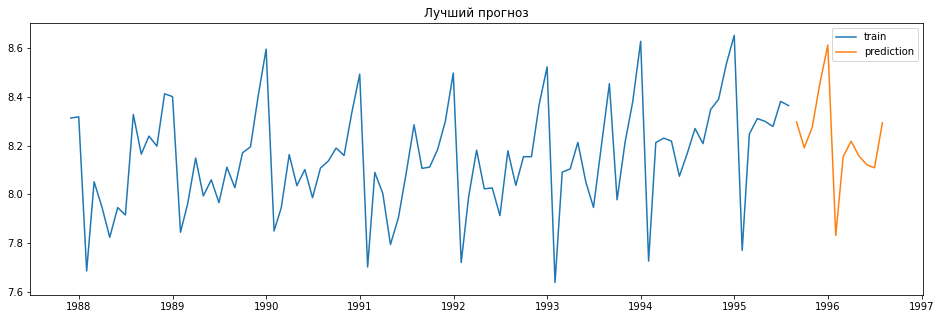

In [31]:
winner = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
winner.fit(q)
winner_pred = pd.Series(list(ets.predict(fh=hor)), index=pd.date_range(start='1995-08', periods=12, freq='M'))

plt.figure(figsize=(16, 5))
plt.plot(ts_log.index[-int(len(q) / 2):], ts_log[-int(len(q) / 2):], label='train')
plt.plot(winner_pred.index, winner_pred, label='prediction')
plt.title('Лучший прогноз')
plt.legend()

## 4.2 Надо кросс-валидацию посчитать. В конце концов, орлы мы или куда?


In [32]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_evaluation import evaluate

In [ ]:
cv = ExpandingWindowSplitter(fh=1, initial_window=int(len(q) * 0.8), step_length=1)
#eval = evaluate(ets, cv=cv, y=q, strategy='refit', scoring=None, fit_params=None, return_data=False)

methods = [naive, naive_seas, sarima, auto, ets, auto_ets]
cv_score = []
for i in methods: 
  eval = evaluate(i, cv=cv, y=q, strategy='refit')
  cv_score.append(eval.iloc[:, -1].mean())

cv_df = pd.DataFrame({'method': names, 'cross_val': cv_score})

In [34]:
cv_df.sort_values(by=['cross_val'])

,method,cross_val
3,auto-sarima,0.011378
4,ets(aaa),0.011494
5,auto-ets,0.011786
2,sarima,0.012785
1,сезонно-наивная,0.013502
0,наивная,0.026517


По результам кросс-валидации растущим окном победила auto-sarima, поздравим ее! 

In [35]:
2 + 2

4

## Панельки. 

Хотел сначала про спорт - мало данных. Хотел про футбол (спортивные передачи) и пиво - и смешно, и все таки Чемпионат Европы сейчас - так там тоже пропусков 99.5%. 

[переменных пришлось перебрать много...]

В данных есть переменная "В обычный рабочий день сколько часов в среднем Вы занимаетесь трудом, требующим
больших физических усилий?" (будем коротко ее называть "физический труд"). 

Вопрос: есть ли здесь какая-то связь с образованием индивида. Логика подсказывает, что да: людям с более высоким уровнем образования, квалификации и т.д., по идее, меньше приходится работать "руками" и больше - "головой". 

Ну так давайте на это посмотрим!

Замечания: 

 1) Пропусков много, поэтому количество наблюдений относительно небольшое

 2) Не совсем понятно, как отличать пропуск от "нет ответа", "затрудняюсь ответить" и др. в переменной "физический труд". В связи с этим, было принято решение удалить все значения, кроме численных, где количество часов указано непосредственно, включая 0. Благо, доля плохо интерпретируемых ответов невелика. 


In [36]:
rlms = pd.read_csv('/content/drive/MyDrive/Data/rlms.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
def antinan(x):
  try:
    return int(x)
  except: 
    return None

In [38]:
data = pd.DataFrame({'sig': rlms.M75.apply(antinan), 'beer_d': rlms.M84_11D.apply(antinan),
                     'beer_l': rlms.M84_11B.apply(antinan) / 1000, 'phys': rlms.J6_2A.apply(antinan),
                      'educ': rlms.DIPLOM_1,
                     'year': rlms.year, 'id': rlms.idind})

In [39]:
d = data.dropna()

In [40]:
d.groupby('year').count()

,sig,beer_d,beer_l,phys,educ,id
year,,,,,,


Ох и ах, наблюдения только за один год остались!  

(на этом моменте я словил сердченый приступ) 

Ладно, я этого не хотел, но придется брать всякую вредную всячину. 


**Вопрос: меньше ли пьют пива люди с более высоким уровнем образования?** 
Может быть, более образованные люди лучше осознают вред чрезмерного употребления алкоголя и сокращают количество выпиваемого хмельного напитка? 

В датафрейме ниже появляется переменная `beer_l` - количество литров пива, выпиваемых респондентом в день. Про уровень образования мы уже говорили, так что переходим к делу.

Кроме того, можем рассмотреть переменную `sig` - количество выкуриваемых в день сигарет. Логика тоже несложная: если уж человеку плевать на свое здоровье (т.е. он курит), то и выпить побольше пенного для него так же не грех.


In [41]:
data = pd.DataFrame({'sig': rlms.M75.apply(antinan),
                     'beer_l': rlms.M84_11B.apply(antinan) / 1000,
                      'educ': rlms.DIPLOM_1,
                     'year': rlms.year, 'id': rlms.idind})

In [42]:
d2 = data.dropna()

In [43]:
d2.groupby('year').count()

,sig,beer_l,educ,id
year,,,,
2008,2153,2153,2153,2153
2009,2018,2018,2018,2018
2010,2734,2734,2734,2734
2011,2745,2745,2745,2745


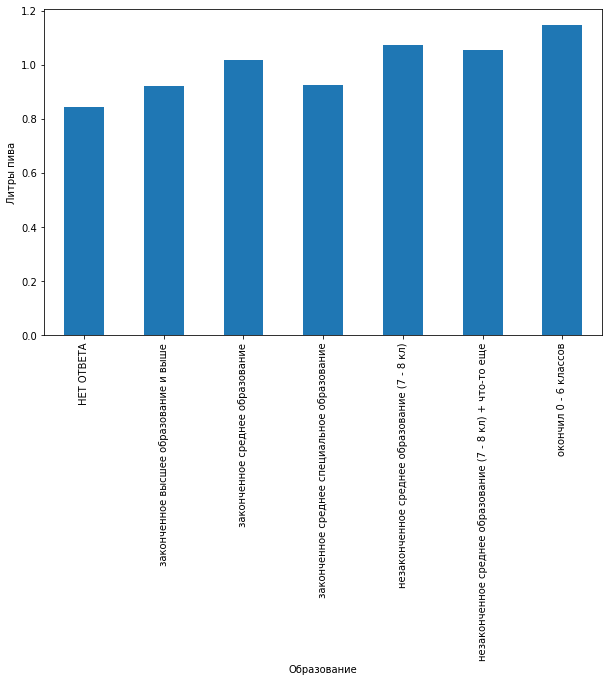

In [44]:
plt.figure(figsize=(10, 6))
d2.groupby('educ').beer_l.mean().plot.bar()
plt.ylabel('Литры пива')
plt.xlabel('Образование')
plt.show()

Наше предпоожение находит себе немного оправдания: индивиды с высшим с средним специальным действительно выпивают в среднем чуть меньше.

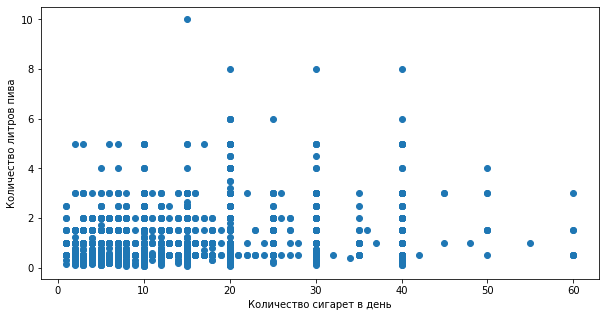

In [45]:
plt.figure(figsize=(10, 5))
plt.scatter(d2.sig, d2.beer_l)
plt.xlabel('Количество сигарет в день')
plt.ylabel('Количество литров пива')
plt.show()

Явного тренда нет, но у заядлых курильщиков все же присутствует небольшая тендеция к увеличенному потреблению данного алкогольного напитка.

In [46]:
d2.educ.unique()

array(['законченное среднее образование',
       'незаконченное среднее образование (7 - 8 кл) + что-то еще',
       'законченное среднее специальное образование',
       'незаконченное среднее образование (7 - 8 кл)',
       'законченное высшее образование и выше', 'окончил 0 - 6 классов',
       'НЕТ ОТВЕТА'], dtype=object)

Для упрощения модели создадим дамми-переменную `high-educ`, равную 1 для высшего и среднего спецаильного и 0 для остальных категорий. 



In [47]:
lis = []
for i in d2.educ:
  if i == 'законченное высшее образование' or i == 'законченное среднее специальное образование':
    lis.append(1)
  else:
    lis.append(0)
d2['high_educ'] = lis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='high_educ'>

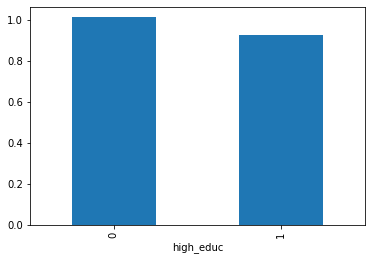

In [48]:
d2.groupby('high_educ').beer_l.mean().plot.bar()

In [49]:
import statsmodels.api as sm

In [50]:
!pip install linearmodels

In [51]:
from linearmodels.panel.model import PanelOLS, RandomEffects, PooledOLS

In [52]:
d2.head(3)

,sig,beer_l,educ,year,id,high_educ
145446,10.0,0.5,законченное среднее образование,2008,30113,0
145461,20.0,1.0,незаконченное среднее образование (7 - 8 кл) +...,2008,11302,0
145462,25.0,0.5,законченное среднее образование,2008,11295,0


In [53]:
d3 = d2.set_index(['id', 'year'])
ex_vars = ['sig', 'high_educ']
exog = sm.add_constant(d3[ex_vars])

## 9-10. Что же, затестим три модели

In [54]:
pm = PooledOLS(d3.beer_l, exog)
pm_res = pm.fit()
print(pm_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 beer_l   R-squared:                        0.0352
Estimator:                  PooledOLS   R-squared (Between):              0.0378
No. Observations:                9650   R-squared (Within):               0.0009
Date:                Thu, Jun 17 2021   R-squared (Overall):              0.0352
Time:                        17:33:07   Log-likelihood                   -9974.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      176.14
Entities:                        5336   P-value                           0.0000
Avg Obs:                       1.8085   Distribution:                  F(2,9647)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             176.14
                            

In [55]:
re = RandomEffects(d3.beer_l, exog)
re_res = re.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 beer_l   R-squared:                        0.0279
Estimator:              RandomEffects   R-squared (Between):              0.0386
No. Observations:                9650   R-squared (Within):               0.0025
Date:                Thu, Jun 17 2021   R-squared (Overall):              0.0346
Time:                        17:33:07   Log-likelihood                   -8003.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      138.22
Entities:                        5336   P-value                           0.0000
Avg Obs:                       1.8085   Distribution:                  F(2,9647)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             126.71
                            

In [56]:
fe = PanelOLS(d3.beer_l, exog, entity_effects=True)
fe_res = fe.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 beer_l   R-squared:                        0.0052
Estimator:                   PanelOLS   R-squared (Between):              0.0285
No. Observations:                9650   R-squared (Within):               0.0052
Date:                Thu, Jun 17 2021   R-squared (Overall):              0.0269
Time:                        17:33:07   Log-likelihood                   -4048.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      11.233
Entities:                        5336   P-value                           0.0000
Avg Obs:                       1.8085   Distribution:                  F(2,4312)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             11.233
                            

# **дальнейший код написан после мягкого дедлайна и до жесткого**

Cудя по результатам F-теста, приведенных выше,(где нулевая гипотеза - качество PooledOLS выше, чем общее качество модели FE) - делаем выбор в пользу альтернативной гипотезы. А значит между PooledOLD и FE выбираем FE.


Теперь про FE и RE, тут поможет тест Хаусмана:

In [57]:
import numpy.linalg as la
from scipy.stats import chi2

In [58]:
b_fe = fe_res.params
b_re = re_res.params

V_fe = fe_res.cov
V_re = re_res.cov
V = V_fe  - V_re

q = b_fe - b_re

df = la.matrix_rank(V)
obs = np.dot(q.T, la.inv(V).dot(q))
cr = chi2.pdf(0.05, df) 

if obs < cr:
  print('Не отвергаем нулевую гипотезу')
else:
  print('Отвергаем')


Отвергаем


Нулевая гипотеза теста Хаусмана - экзогенность факторов, т.е. их некоррелированность с ошибками. Нулевая гипотеза отвергается, следовательно оценки RE несостоятельны и предпочтение отдаем снова FE модели. 

### Победитель - FE

Насчет ответа на вопрос: 

Коэф. при переменной `high_educ` не значим для любого адекватного уровня значимости. То есть, разница в образовании не играет существенной роли в потреблении указанного продукта. 

Остальные коэфициенты, наоборот, для любого уровня значимы. 
Тем не менее, выявленная связь потребления табака и пива довольно слаба: 1 сигарета в среднем добавляет 8.6 грамма пива в ежедневный рацион индивида. 
